In [1]:
!cd

C:\Users\jayar\Desktop\MY PROJECTS\Image Classification


In [70]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

Load Dataset

In [54]:
#X_train -> inputs/features   y_train -> labels/targets
x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')

#X_test -> inputs/features   y_test -> labels/targets
x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv',delimiter = ',')

x_train = x_train/255.0
x_test = x_test/255.0

In [55]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [56]:
print("Shape of X_train:" ,x_train.shape)

Shape of X_train: (2000, 100, 100, 3)


In [57]:
print("Shape of Y_train:" ,y_train.shape)

Shape of Y_train: (2000, 1)


In [58]:
print("Shape of X_test:" ,x_test.shape)

Shape of X_test: (400, 100, 100, 3)


In [59]:
print("Shape of Y_test:" ,y_test.shape)

Shape of Y_test: (400, 1)


In [82]:
#Printing single image of data
x_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

<function matplotlib.pyplot.show(close=None, block=None)>

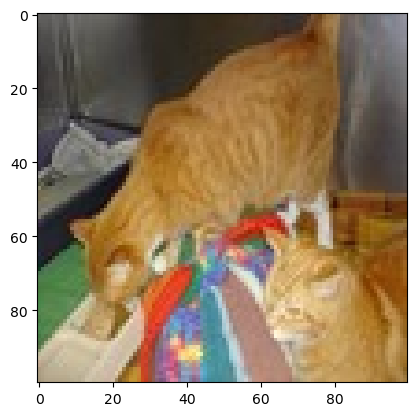

In [84]:
idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show

Model Implementation

In [86]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\jayar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model.compile(loss = 'binary_crossentropy' ,optimizer = 'adam',metrics = ['accuracy'])

In [92]:
model.fit(x_train,y_train,epochs = 5,batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.4925 - loss: 0.7757
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.5205 - loss: 0.6890
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.6078 - loss: 0.6635
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.7078 - loss: 0.5898
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.7186 - loss: 0.5497


In [94]:
model.fit(x_train,y_train,epochs = 5,batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.7785 - loss: 0.4873
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.7781 - loss: 0.4718
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.8240 - loss: 0.4176
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.8507 - loss: 0.3591
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.8705 - loss: 0.3198


In [96]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5914 - loss: 0.8410


[0.6665405035018921, 0.6924999952316284]

Making Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Our Model says it is a  dog


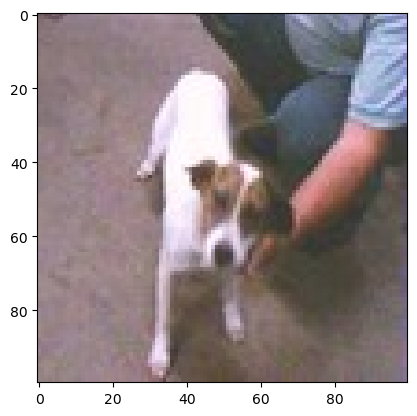

In [122]:
idx1 = random.randint(0,len(y_test))
plt.imshow(x_test[idx1,:])
plt.show

y_predict = model.predict(x_test[idx1,:].reshape(1,100,100,3))
y_predict = y_predict >0.5

if (y_predict == 0):
    pred = 'dog'
else:
    pred= 'cat'

print("Our Model says it is a ",pred)